# Warning

Я использую локальную ubuntu с anaconda и установленным pyspark и код пишу в google colab, так как у них, по моему скромному менению, лучший gui.

А эта анаконда доступна извне, следовательно, при большом желании вы можете открыть http://176.99.158.202:8888/tree и запустить Spark_lab.ipynb, предварительно уточнив включён ли компьютер и hadoop.

# File transfer

In [ ]:
!~/hadoop-3.3.1/bin/hdfs dfs -put ~/archive/ml-100k/u.data /u.data

put: `/u.data': File exists


In [ ]:
!~/hadoop-3.3.1/bin/hdfs dfs -put ~/archive/ml-100k/u.item /u.item

put: `/u.item': File exists


# Begin

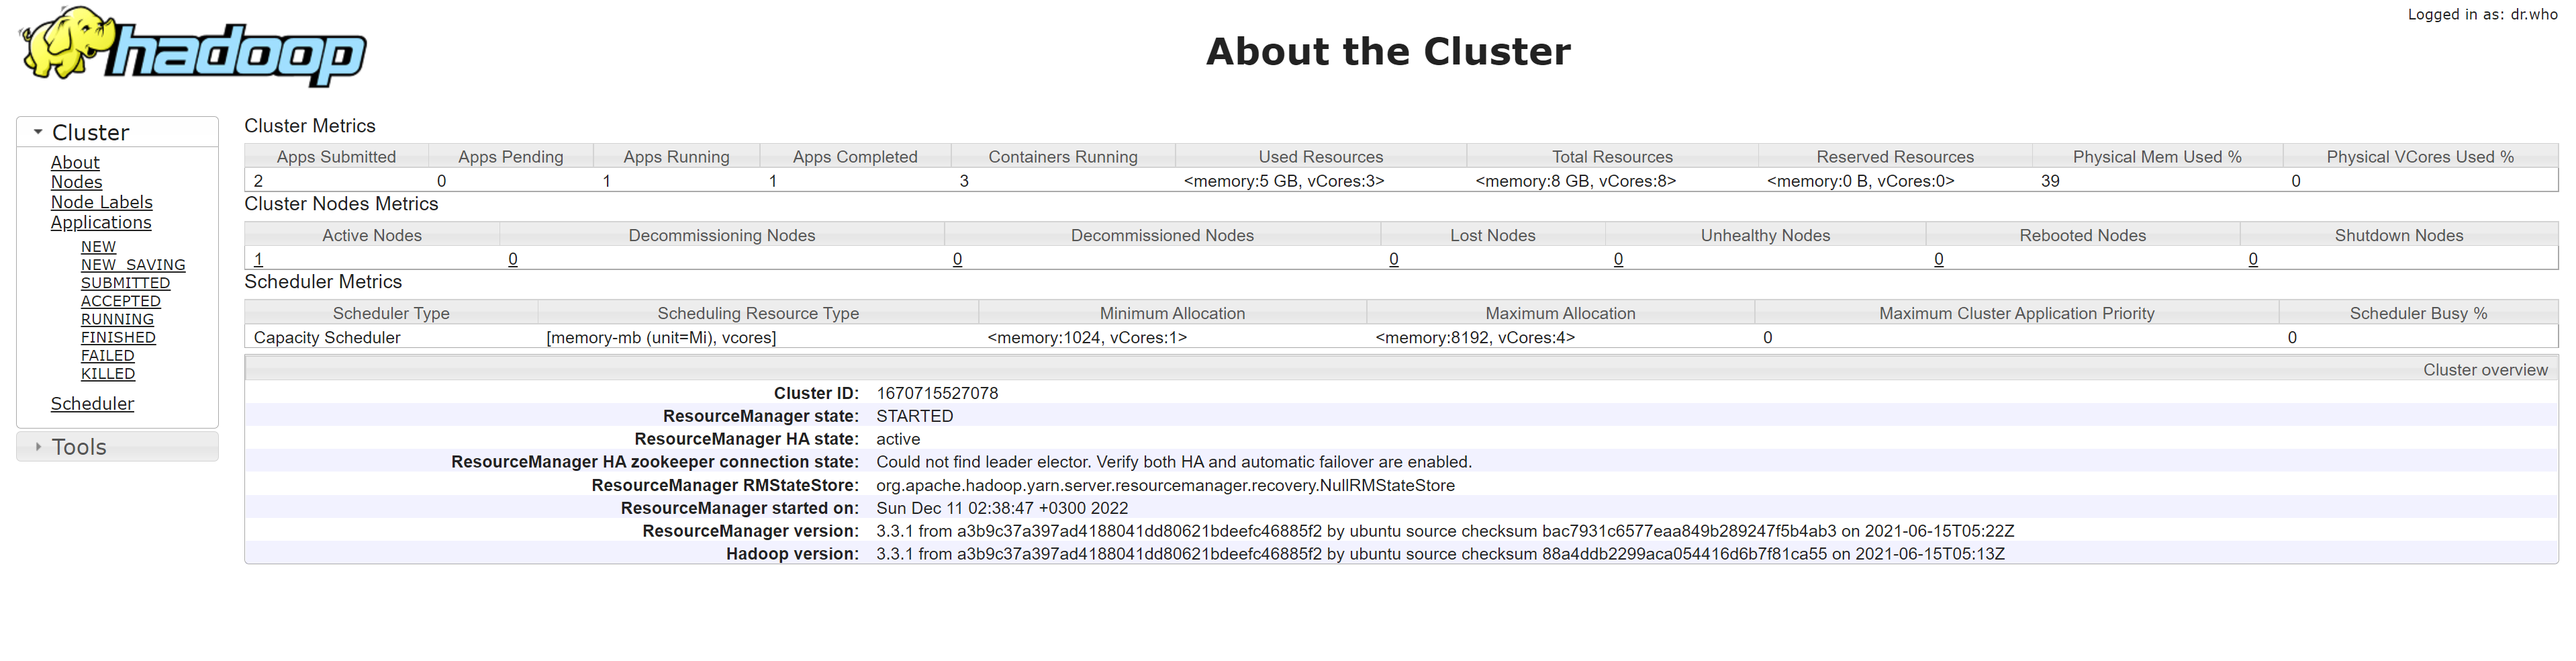

http://176.99.158.202:8088/cluster/

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "./spark-3.2.0-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkConf


conf = SparkConf().set("spark.yarn.queue", "dev")
spark = SparkSession.builder.master("yarn").config(conf=conf).getOrCreate() 
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
!ls

Spark_lab.ipynb  hadoop-3.3.1	      spark-3.2.0-bin-hadoop3.2
anaconda3	 hadoop-3.3.1.tar.gz  spark-3.2.0-bin-hadoop3.2.tgz
archive		 hdfs		      spark-3.3.1-bin-hadoop3.tgz
archive.zip	 output.json


In [ ]:
df_rating = spark.read.options(delimiter='\t').csv('hdfs://localhost:9000/u.data')
df_rating.printSchema()
df_rating

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)



_c0,_c1,_c2,_c3
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596
298,474,4,884182806
115,265,2,881171488
253,465,5,891628467
305,451,3,886324817
6,86,3,883603013


In [ ]:
newColumns = ['user_id', 'item_id', 'rating', 'timestamp']
df_rating = df_rating.toDF(*newColumns)

In [ ]:
df_rating

user_id,item_id,rating,timestamp
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596
298,474,4,884182806
115,265,2,881171488
253,465,5,891628467
305,451,3,886324817
6,86,3,883603013


In [ ]:
df_film = spark.read.options(delimiter='|').csv('hdfs://localhost:9000/u.item').toDF('movie_id', 'movie_title', 'release_date', 'video_release date', 
              'IMDb_URL', 'unknown', 'Action ', 'Adventure', 'Animation', 
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western')
df_film

movie_id,movie_title,release_date,video_release date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,null,http://us.imdb.co...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,null,http://us.imdb.co...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,null,http://us.imdb.co...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,null,http://us.imdb.co...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,null,http://us.imdb.co...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Y...,01-Jan-1995,null,http://us.imdb.co...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1...,01-Jan-1995,null,http://us.imdb.co...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),01-Jan-1995,null,http://us.imdb.co...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking ...,01-Jan-1995,null,http://us.imdb.co...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),22-Jan-1996,null,http://us.imdb.co...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_film.filter("Movie_id == 243").collect()

[Row(movie_id='243', movie_title='Jungle2Jungle (1997)', release_date='07-Mar-1997', video_release date=None, IMDb_URL='http://us.imdb.com/M/title-exact?Jungle2Jungle%20(1997)', unknown='0', Action ='0', Adventure='0', Animation='0', Children's='1', Comedy='1', Crime='0', Documentary='0', Drama='0', Fantasy='0', Film-Noir='0', Horror='0', Musical='0', Mystery='0', Romance='0', Sci-Fi='0', Thriller='0', War='0', Western='0')]

In [ ]:
agg_table = df_rating.groupBy('item_id', 'rating').agg({'rating': 'sum'}).orderBy('item_id', 'rating').toPandas()
agg_table

,item_id,rating,sum(rating)
0,1,1,8.0
1,1,2,54.0
2,1,3,288.0
3,1,4,808.0
4,1,5,595.0
...,...,...,...
6709,998,5,10.0
6710,999,1,1.0
6711,999,2,8.0
6712,999,3,3.0


In [ ]:
agg_table[agg_table.item_id == '1']['sum(rating)']

0      8.0
1     54.0
2    288.0
3    808.0
4    595.0
Name: sum(rating), dtype: float64

Моя группа 211 + номер по списку 32 = 243

In [ ]:
import json
import ast

out_json = {"rat_film": {}, "rat_all": {}}

out_json['rat_film'] = agg_table[agg_table.item_id == '243']['sum(rating)'].to_list()

out_json['rat_all'] = agg_table.groupby('rating')['sum(rating)'].sum().to_list()

with open('output.json', 'w') as file:
  json.dump(out_json, file, indent='  ')

out_json

{'rat_film': [36.0, 64.0, 117.0, 80.0, 25.0],
 'rat_all': [6110.0, 22740.0, 81435.0, 136696.0, 106005.0]}